In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import cifar10
from sklearn.metrics import confusion_matrix, accuracy_score


# New Section

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [3]:
classes_name=['airplane', 
  'automobile',
	'bird',
	'cat',
	'deer',
	'dog',
	'frog',
	'horse',
	'ship',
	'truck']

In [4]:
x_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

'ship'

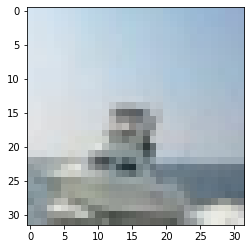

In [5]:
class_number = 100
plt.imshow(x_train[class_number])
classes_name[y_train[class_number][0]]

In [6]:
# normalizing the data

x_train, x_test = x_train/255, x_test/255

In [16]:
model = Sequential()
model.add(Conv2D(16, 3, activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPool2D())

model.add(Conv2D(16*2, 3, activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPool2D())

model.add(Conv2D(16*2, 3, activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPool2D())

model.add(Flatten())

model.add(Dense(32, activation= 'relu'))

model.add(Dense(32, activation= 'relu'))

model.add(Dense(32, activation= 'relu'))

model.add(Dense(10, activation= 'softmax'))

In [17]:
model.compile(optimizer='adam', loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [18]:
model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2)  

Epoch 1/50
1250/1250 [==============================] - 9s 7ms/step - loss: 1.7037 - accuracy: 0.3681 - val_loss: 1.4681 - val_accuracy: 0.4621
Epoch 2/50
1250/1250 [==============================] - 9s 7ms/step - loss: 1.3718 - accuracy: 0.5020 - val_loss: 1.3091 - val_accuracy: 0.5247
Epoch 3/50
1250/1250 [==============================] - 8s 6ms/step - loss: 1.2498 - accuracy: 0.5547 - val_loss: 1.2054 - val_accuracy: 0.5692
Epoch 4/50
1250/1250 [==============================] - 8s 6ms/step - loss: 1.1711 - accuracy: 0.5827 - val_loss: 1.1639 - val_accuracy: 0.5874
Epoch 5/50
1250/1250 [==============================] - 8s 6ms/step - loss: 1.1125 - accuracy: 0.6036 - val_loss: 1.1134 - val_accuracy: 0.6088
Epoch 6/50
1250/1250 [==============================] - 8s 6ms/step - loss: 1.0614 - accuracy: 0.6271 - val_loss: 1.1289 - val_accuracy: 0.6001
Epoch 7/50
1250/1250 [==============================] - 8s 6ms/step - loss: 1.0166 - accuracy: 0.6419 - val_loss: 1.0881 - val_accuracy:

In [19]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.1559 - accuracy: 0.6472


[1.15593683719635, 0.6471999883651733]

In [20]:
y_pred = model.predict(x_test)

Predicted output is cat
Actual output is bird


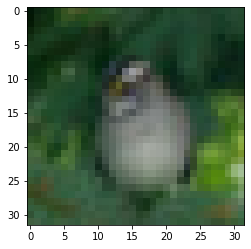

In [21]:
import numpy as np

class_number = 900

print(f'Predicted output is {classes_name[np.argmax([y_pred[class_number]])]}')
print(f'Actual output is {classes_name[y_test[class_number][0]]}')

plt.imshow(x_test[class_number])

In [22]:
model.save('cifar_10.h5')

In [23]:
from tensorflow import keras
abc = keras.models.load_model('cifar_10.h5')

In [24]:
abc.predict(x_test)

array([[6.7370333e-05, 1.7765071e-05, 3.1509919e-03, ..., 1.7253400e-04,
        2.2418817e-04, 8.2848426e-05],
       [2.5229738e-08, 9.9995100e-01, 1.6317069e-11, ..., 2.2241384e-09,
        4.3533902e-05, 5.4819834e-06],
       [3.0071355e-02, 1.2923255e-02, 5.5280374e-04, ..., 1.3365124e-04,
        9.0986699e-01, 2.1127611e-02],
       ...,
       [1.6390806e-05, 5.9949834e-08, 9.6769462e-04, ..., 7.1079959e-04,
        3.1886675e-06, 4.1380795e-06],
       [7.6524159e-03, 5.7568651e-04, 3.0180000e-02, ..., 5.4874665e-01,
        1.1101421e-03, 2.5108934e-03],
       [1.0118808e-09, 1.4743290e-13, 1.7987141e-07, ..., 9.9928242e-01,
        4.8491833e-09, 7.3851386e-10]], dtype=float32)